In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


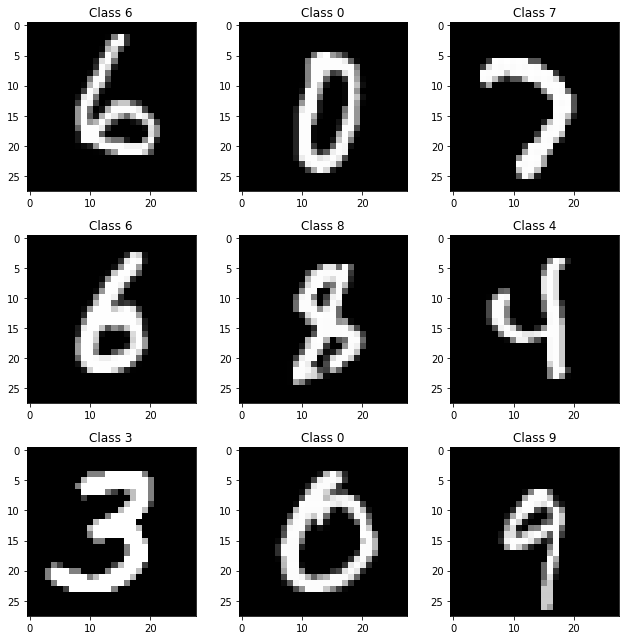

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(x_train))
  plt.imshow(x_train[num], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
def matprint(mat, fmt="g"):
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
  for x in mat:
    for i, y in enumerate(x):
      print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=" ")
    print("")

matprint(x_train[num])

0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0  11 132 254 253 102   0   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0   0 173 252 253 252 203  20   0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0   0  82 255 253 244 223 255  91  21 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0   0  41 243 253 252  81  20 131 252 142 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0  21 173 253 204  20   0   0  72 253 204 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0  0 102 253 212  20   0   0  82 112 252 203 0 0 0

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("Formato de matriz de treinamento", x_train.shape)
print("Formato de matriz de teste", x_test.shape)

Formato de matriz de treinamento (60000, 784)
Formato de matriz de teste (10000, 784)


In [ ]:
nb_classes = 10

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

In [ ]:
#Primeira camada

In [ ]:
model.add(Dense(512, input_shape=(784,)))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
#Segunda camada

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
#Camada final de saída

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff51935a2b0>>

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Treinamento do modelo
model.fit(x_train, y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9776
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9852


In [ ]:
#Validação da acurácia do modelo em um teste de dados
score = model.evaluate(x_test, y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9809
Test score:  0.0611448734998703
Test accuracy:  0.98089998960495


In [ ]:
#Inspeção da saída
predicted_classes = model.predict_classes(x_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


<Figure size 648x648 with 0 Axes>

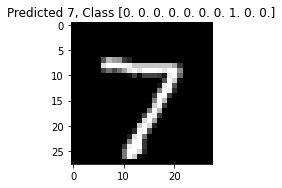

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()